In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [115]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 50)
        self.fc3 = nn.Linear(50, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, -1)
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


In [116]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
criterion = nn.NLLLoss()

In [117]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [118]:
import numpy as np

In [119]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

In [120]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=1000, 
                                          shuffle=True, 
                                          num_workers=1),
}

In [124]:
from torch.autograd import Variable
losses = []
for epoch in range(10):
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = Variable(data), Variable(target)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 200 == 199:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, batch_idx + 1, running_loss / 200))
            losses.append(running_loss/200)
            running_loss = 0.0

[1,   200] loss: 0.266
[1,   400] loss: 0.243
[1,   600] loss: 0.223
[2,   200] loss: 0.191
[2,   400] loss: 0.179
[2,   600] loss: 0.166
[3,   200] loss: 0.141
[3,   400] loss: 0.135
[3,   600] loss: 0.130
[4,   200] loss: 0.118
[4,   400] loss: 0.112
[4,   600] loss: 0.095
[5,   200] loss: 0.096
[5,   400] loss: 0.090
[5,   600] loss: 0.088
[6,   200] loss: 0.078
[6,   400] loss: 0.075
[6,   600] loss: 0.075
[7,   200] loss: 0.064
[7,   400] loss: 0.064
[7,   600] loss: 0.069
[8,   200] loss: 0.055
[8,   400] loss: 0.053
[8,   600] loss: 0.059
[9,   200] loss: 0.049
[9,   400] loss: 0.048
[9,   600] loss: 0.050
[10,   200] loss: 0.041
[10,   400] loss: 0.040
[10,   600] loss: 0.048


In [125]:
total = 0
correct = 0
for k, (data, target) in enumerate(loaders['test']):
    data = data.view(-1, 28*28)
    
    outputs = net(data)
    _, predicted = torch.max(outputs.data, 1)
    
    correct += (predicted == target).sum().item()
    total += target.size(0)
print(correct/total)

0.9773


In [123]:
def accuracy_by_num(model, test_data):
    fails = np.zeros(10) # Network's mistakes by number
    nums = np.zeros(10) # Amount of each number

    for i, (data, target) in enumerate(test_data):
        data = data.view(-1, 28*28)
        outputs = model(data)
        predicted = torch.argmax(outputs.data, dim = 1)
    
        for i, element in enumerate(predicted):
            nums[target[i]] = nums[target[i]] + 1
            if element != target[i]:
                fails[target[i]] = fails[target[i]] + 1

    accuracy_by_num = 1 - np.divide(fails, nums)
    return np.around(accuracy_by_num, 4)

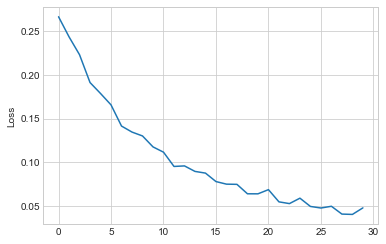

In [126]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
figure = plt.figure()
ax1 = figure.add_subplot()
ax1.set_ylabel('Loss')
ax1.plot(losses)

In [30]:
accuracy_by_num(net, loaders['test'])

array([0.9867, 0.9894, 0.9719, 0.9634, 0.9817, 0.9809, 0.9791, 0.9698,
       0.9784, 0.9574])

In [12]:
x = torch.randn(100, 28*28)
out = net(x)
onnx_path = "onnx_model_name.onnx"
torch.onnx.export(net, x, onnx_path)

In [13]:
PATH = 'bpModel.pth'
torch.save(net.state_dict(), PATH)